<a href="https://colab.research.google.com/github/atopatalos/Fake_News_Detection/blob/main/FakeNewsClassification_using_RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name : Patalo Selobakin


# TASK #1: UNDERSTAND THE PROBLEM STATMENT AND BUSINESS CASE

Problem Statement:

With the upcoming of digitalization and the advancement of news in the internet, it has been a challenge to differentiate true news from fake news.
Hence it imperative to be able to differentiate or identiry which news are FAKE.

The goal:

1.   To detect fake news based on Recurrent Neural Networks
2.   NLP work by converting words (text) into numbers
3.   These numbers are then used to train an AI/ML models to make predictions
4.   AI/ML based fake news detector is crucial for companies and media to automatically predict if news is fake or not
5.   We will analyze thousands of news text to detect if it is fake or not




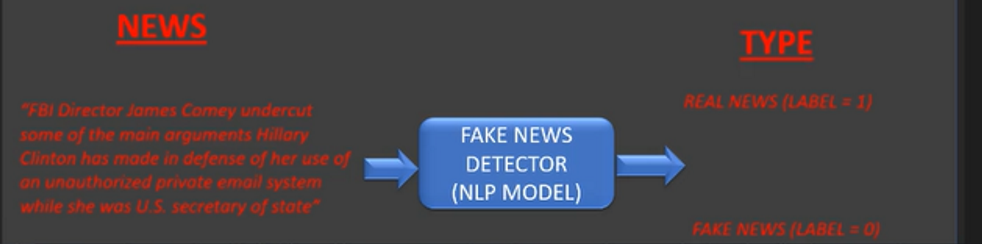![image.png](attachment:image.png)

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [ ]:
!pip install --upgrade tensorflow-gpu==2.8.0rc0

In [ ]:
!pip install jupyterthemes

In [ ]:
!pip install plotly                      # libraries for creating interactive graphs and visualization
!pip install --upgrade nbformat          # part of Jupyter notebook format
!pip install nltk                        # library for NLP-natural language processing
!pip install spacy                       # spaCy is an open-source software library for advanced natural language processing
!pip install WordCloud                   # library for creating world cloud visualizations
!pip install gensim                      # Gensim is an open-source library for unsupervised topic modeling and natural language processing; a library for unsupervised topic modeling and natural language processing. It is widely used for tasks like document similarity analysis, topic modeling, and word vector embeddings.


import nltk
nltk.download('punkt')                   # which are used for sentence and word tokenization in NLP tasks.

# Common Libraries
import tensorflow as tf                  # an open-source library for machine learning and deep learning.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries related to NLP
from wordcloud import WordCloud, STOPWORDS
import nltk
import re                                                    # Python's regular expression (re) module for text processing tasks
from nltk.stem import PorterStemmer, WordNetLemmatizer       # Imports PorterStemmer and WordNetLemmatizer from NLTK for stemming and lemmatization, which are techniques for reducing words to their base or root form.
from nltk.corpus import stopwords                            # Imports the stopwords corpus from NLTK, which is a list of common stopwords that can be filtered out from text data.
from nltk.tokenize import word_tokenize, sent_tokenize       # Imports simple_preprocess from Gensim for preprocessing text data into a list of tokens.
import gensim                                                # a library for topic modeling and document similarity analysis.
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

# import keras
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
# setting the style of the notebook to be monokai theme
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# data location
# path_true = '/content/sample_data/True.csv'
# path_fake = '/content/sample_data/Fake.csv'
path_true = '/content/drive/MyDrive/datasets/True.csv'
path_fake = '/content/drive/MyDrive/datasets/True.csv'

# load the data
df_true = pd.read_csv(path_true)
df_fake = pd.read_csv(path_fake)

In [ ]:
# Check the 20 first rows
df_true.head(20)

title  \
0   As U.S. budget fight looms, Republicans flip t...   
1   U.S. military to accept transgender recruits o...   
2   Senior U.S. Republican senator: 'Let Mr. Muell...   
3   FBI Russia probe helped by Australian diplomat...   
4   Trump wants Postal Service to charge 'much mor...   
5   White House, Congress prepare for talks on spe...   
6   Trump says Russia probe will be fair, but time...   
7   Factbox: Trump on Twitter (Dec 29) - Approval ...   
8          Trump on Twitter (Dec 28) - Global Warming   
9   Alabama official to certify Senator-elect Jone...   
10  Jones certified U.S. Senate winner despite Moo...   
11  New York governor questions the constitutional...   
12  Factbox: Trump on Twitter (Dec 28) - Vanity Fa...   
13     Trump on Twitter (Dec 27) - Trump, Iraq, Syria   
14  Man says he delivered manure to Mnuchin to pro...   
15  Virginia officials postpone lottery drawing to...   
16  U.S. lawmakers question businessman at 2016 Tr...   
17  Trump on Twitter (Dec 26) - Hillary Clinton, T...   
18  U.S. appeals court rejects challenge to Trump ...   
19  Treasury Secretary Mnuchin was sent gift-wrapp...   

                                                 text       subject  \
0   WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1   WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2   WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3   WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4   SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
5   WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...  politicsNews   
6   WEST PALM BEACH, Fla (Reuters) - President Don...  politicsNews   
7   The following statements were posted to the ve...  politicsNews   
8   The following statements were posted to the ve...  politicsNews   
9   WASHINGTON (Reuters) - Alabama Secretary of St...  politicsNews   
10  (Reuters) - Alabama officials on Thursday cert...  politicsNews   
11  NEW YORK/WASHINGTON (Reuters) - The new U.S. t...  politicsNews   
12  The following statements were posted to the ve...  politicsNews   
13  The following statements were posted to the ve...  politicsNews   
14   (In Dec. 25 story, in second paragraph, corre...  politicsNews   
15  (Reuters) - A lottery drawing to settle a tied...  politicsNews   
16  WASHINGTON (Reuters) - A Georgian-American bus...  politicsNews   
17  The following statements were posted to the ve...  politicsNews   
18  (Reuters) - A U.S. appeals court in Washington...  politicsNews   
19  (Reuters) - A gift-wrapped package addressed t...  politicsNews   

                  date  
0   December 31, 2017   
1   December 29, 2017   
2   December 31, 2017   
3   December 30, 2017   
4   December 29, 2017   
5   December 29, 2017   
6   December 29, 2017   
7   December 29, 2017   
8   December 29, 2017   
9   December 28, 2017   
10  December 28, 2017   
11  December 28, 2017   
12  December 28, 2017   
13  December 28, 2017   
14  December 25, 2017   
15  December 27, 2017   
16  December 27, 2017   
17  December 26, 2017   
18  December 26, 2017   
19  December 24, 2017

ADDITIONAL TASKS#1:
- Indicate how many data samples do we have per class (i.e.: Fake and True)
- List how many Null element are present and the memory usage for each dataframe

In [ ]:
# Counting how many data samples
# returns a tuple representing the dimensionality of the DataFrame. The first element of the tuple is the number of rows
df_true.shape[0]

21417

In [ ]:
# Counting how many data samples
# Count the number of rows using len()
num_rows_true = len(df_true)
print(f"Number of rows: {num_rows_true}")

Number of rows: 21417


In [ ]:
# Counting how many data samples
# returns a tuple representing the dimensionality of the DataFrame. The first element of the tuple is the number of rows
df_fake.shape[0]

21417

In [ ]:
# 2. List the number of Null elements present in each column
null_counts_fake = df_fake.isnull().sum()
null_counts_true = df_true.isnull().sum()
print("\nNumber of null elements in each column:")
print(null_counts_fake)
print(null_counts_true)


Number of null elements in each column:
title      0
text       0
subject    0
date       0
dtype: int64
title      0
text       0
subject    0
date       0
dtype: int64


In [ ]:
# data containing real news
df_true
# data containing fake news
df_fake
# dataframe information
df_true.info()
# dataframe information
df_fake.info()
# check for null values
df_true.isnull().sum()
# check for null values
df_fake.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   isfake   21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   isfake   21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB


title      0
text       0
subject    0
date       0
isfake     0
dtype: int64

# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [ ]:
# Add a target class column to indicate whether the news is real or fake => for dataframe of fake file
df_true['isfake'] = 1
df_true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  isfake  
0  December 31, 2017        1  
1  December 29, 2017        1  
2  December 31, 2017        1  
3  December 30, 2017        1  
4  December 29, 2017        1

In [ ]:
# Add a target class column to indicate whether the news is real or fake => for dataframe of true file
df_fake['isfake'] = 0
df_fake.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  isfake  
0  December 31, 2017        0  
1  December 29, 2017        0  
2  December 31, 2017        0  
3  December 30, 2017        0  
4  December 29, 2017        0

In [ ]:
# Concatenate Real and Fake News
df = pd.concat([df_true, df_fake]).reset_index(drop = True)
df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
42829  'Fully committed' NATO backs new U.S. approach...   
42830  LexisNexis withdrew two products from Chinese ...   
42831  Minsk cultural hub becomes haven from authorities   
42832  Vatican upbeat on possibility of Pope Francis ...   
42833  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
42829  BRUSSELS (Reuters) - NATO allies on Tuesday we...     worldnews   
42830  LONDON (Reuters) - LexisNexis, a provider of l...     worldnews   
42831  MINSK (Reuters) - In the shadow of disused Sov...     worldnews   
42832  MOSCOW (Reuters) - Vatican Secretary of State ...     worldnews   
42833  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...     worldnews   

                     date  isfake  
0      December 31, 2017        1  
1      December 29, 2017        1  
2      December 31, 2017        1  
3      December 30, 2017        1  
4      December 29, 2017        1  
...                   ...     ...  
42829    August 22, 2017        0  
42830    August 22, 2017        0  
42831    August 22, 2017        0  
42832    August 22, 2017        0  
42833    August 22, 2017        0  

[42834 rows x 5 columns]

In [ ]:
# Remove the column "date", and use inplace True to change also in the memory
df.drop(columns = ['date'], inplace = True)

In [ ]:
# combine title and text together
df['original'] = df['title'] + ' ' + df['text']
df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  isfake  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews       1   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews       1   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews       1   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews       1   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews       1   

                                            original  
0  As U.S. budget fight looms, Republicans flip t...  
1  U.S. military to accept transgender recruits o...  
2  Senior U.S. Republican senator: 'Let Mr. Muell...  
3  FBI Russia probe helped by Australian diplomat...  
4  Trump wants Postal Service to charge 'much mor...

In [ ]:
# Check the original data
df['original'][0]

'As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non

# TASK #4: PERFORM DATA CLEANING

In [ ]:
# download stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [ ]:
# The function to filter result based on two criteria:
# Remove stopwords and remove words with 2 or less characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)

    return result

In [ ]:
# Apply the function to the dataframe
# Create a new column name "clean"
df['clean'] = df['original'].apply(preprocess)

In [ ]:
# Show original news
df['original'][0]

'As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non

In [ ]:
# Show cleaned up news after removing stopwords
print(df['clean'][0])

['budget', 'fight', 'looms', 'republicans', 'flip', 'fiscal', 'script', 'washington', 'reuters', 'head', 'conservative', 'republican', 'faction', 'congress', 'voted', 'month', 'huge', 'expansion', 'national', 'debt', 'cuts', 'called', 'fiscal', 'conservative', 'sunday', 'urged', 'budget', 'restraint', 'keeping', 'sharp', 'pivot', 'republicans', 'representative', 'mark', 'meadows', 'speaking', 'face', 'nation', 'drew', 'hard', 'line', 'federal', 'spending', 'lawmakers', 'bracing', 'battle', 'january', 'return', 'holidays', 'wednesday', 'lawmakers', 'begin', 'trying', 'pass', 'federal', 'budget', 'fight', 'likely', 'linked', 'issues', 'immigration', 'policy', 'november', 'congressional', 'election', 'campaigns', 'approach', 'republicans', 'seek', 'control', 'congress', 'president', 'donald', 'trump', 'republicans', 'want', 'budget', 'increase', 'military', 'spending', 'democrats', 'want', 'proportional', 'increases', 'defense', 'discretionary', 'spending', 'programs', 'support', 'educati

In [ ]:
# Check again the dataframe
df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
42829  'Fully committed' NATO backs new U.S. approach...   
42830  LexisNexis withdrew two products from Chinese ...   
42831  Minsk cultural hub becomes haven from authorities   
42832  Vatican upbeat on possibility of Pope Francis ...   
42833  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
42829  BRUSSELS (Reuters) - NATO allies on Tuesday we...     worldnews   
42830  LONDON (Reuters) - LexisNexis, a provider of l...     worldnews   
42831  MINSK (Reuters) - In the shadow of disused Sov...     worldnews   
42832  MOSCOW (Reuters) - Vatican Secretary of State ...     worldnews   
42833  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...     worldnews   

       isfake                                           original  \
0           1  As U.S. budget fight looms, Republicans flip t...   
1           1  U.S. military to accept transgender recruits o...   
2           1  Senior U.S. Republican senator: 'Let Mr. Muell...   
3           1  FBI Russia probe helped by Australian diplomat...   
4           1  Trump wants Postal Service to charge 'much mor...   
...       ...                                                ...   
42829       0  'Fully committed' NATO backs new U.S. approach...   
42830       0  LexisNexis withdrew two products from Chinese ...   
42831       0  Minsk cultural hub becomes haven from authorit...   
42832       0  Vatican upbeat on possibility of Pope Francis ...   
42833       0  Indonesia to buy $1.14 billion worth of Russia...   

                                                   clean  
0      [budget, fight, looms, republicans, flip, fisc...  
1      [military, accept, transgender, recruits, mond...  
2      [senior, republican, senator, mueller, washing...  
3      [russia, probe, helped, australian, diplomat, ...  
4      [trump, wants, postal, service, charge, amazon...  
...                                                  ...  
42829  [fully, committed, nato, backs, approach, afgh...  
42830  [lexisnexis, withdrew, products, chinese, mark...  
42831  [minsk, cultural, authorities, minsk, reuters,...  
42832  [vatican, upbeat, possibility, pope, francis, ...  
42833  [indonesia, billion, worth, russian, jets, jak...  

[42834 rows x 6 columns]

In [ ]:
# Obtain the total words present in the dataset
list_of_words = []
for i in df.clean:
    for j in i:
        list_of_words.append(j)


In [ ]:
# Chek again the content of list_of_words
list_of_words

['budget',
 'fight',
 'looms',
 'republicans',
 'flip',
 'fiscal',
 'script',
 'washington',
 'reuters',
 'head',
 'conservative',
 'republican',
 'faction',
 'congress',
 'voted',
 'month',
 'huge',
 'expansion',
 'national',
 'debt',
 'cuts',
 'called',
 'fiscal',
 'conservative',
 'sunday',
 'urged',
 'budget',
 'restraint',
 'keeping',
 'sharp',
 'pivot',
 'republicans',
 'representative',
 'mark',
 'meadows',
 'speaking',
 'face',
 'nation',
 'drew',
 'hard',
 'line',
 'federal',
 'spending',
 'lawmakers',
 'bracing',
 'battle',
 'january',
 'return',
 'holidays',
 'wednesday',
 'lawmakers',
 'begin',
 'trying',
 'pass',
 'federal',
 'budget',
 'fight',
 'likely',
 'linked',
 'issues',
 'immigration',
 'policy',
 'november',
 'congressional',
 'election',
 'campaigns',
 'approach',
 'republicans',
 'seek',
 'control',
 'congress',
 'president',
 'donald',
 'trump',
 'republicans',
 'want',
 'budget',
 'increase',
 'military',
 'spending',
 'democrats',
 'want',
 'proportional',
 '

In [ ]:
# List of non-unique words
len(list_of_words)

8784748

In [ ]:
# Obtain the total number of unique words
# set : create the unique -> list -> len (calculate the length of the list)
total_words = len(list(set(list_of_words)))
total_words

60687

In [ ]:
# join the words into a string
df['clean_joined'] = df['clean'].apply(lambda x: " ".join(x))

In [ ]:
df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
42829  'Fully committed' NATO backs new U.S. approach...   
42830  LexisNexis withdrew two products from Chinese ...   
42831  Minsk cultural hub becomes haven from authorities   
42832  Vatican upbeat on possibility of Pope Francis ...   
42833  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
42829  BRUSSELS (Reuters) - NATO allies on Tuesday we...     worldnews   
42830  LONDON (Reuters) - LexisNexis, a provider of l...     worldnews   
42831  MINSK (Reuters) - In the shadow of disused Sov...     worldnews   
42832  MOSCOW (Reuters) - Vatican Secretary of State ...     worldnews   
42833  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...     worldnews   

       isfake                                           original  \
0           1  As U.S. budget fight looms, Republicans flip t...   
1           1  U.S. military to accept transgender recruits o...   
2           1  Senior U.S. Republican senator: 'Let Mr. Muell...   
3           1  FBI Russia probe helped by Australian diplomat...   
4           1  Trump wants Postal Service to charge 'much mor...   
...       ...                                                ...   
42829       0  'Fully committed' NATO backs new U.S. approach...   
42830       0  LexisNexis withdrew two products from Chinese ...   
42831       0  Minsk cultural hub becomes haven from authorit...   
42832       0  Vatican upbeat on possibility of Pope Francis ...   
42833       0  Indonesia to buy $1.14 billion worth of Russia...   

                                                   clean  \
0      [budget, fight, looms, republicans, flip, fisc...   
1      [military, accept, transgender, recruits, mond...   
2      [senior, republican, senator, mueller, washing...   
3      [russia, probe, helped, australian, diplomat, ...   
4      [trump, wants, postal, service, charge, amazon...   
...                                                  ...   
42829  [fully, committed, nato, backs, approach, afgh...   
42830  [lexisnexis, withdrew, products, chinese, mark...   
42831  [minsk, cultural, authorities, minsk, reuters,...   
42832  [vatican, upbeat, possibility, pope, francis, ...   
42833  [indonesia, billion, worth, russian, jets, jak...   

                                            clean_joined  
0      budget fight looms republicans flip fiscal scr...  
1      military accept transgender recruits monday pe...  
2      senior republican senator mueller washington r...  
3      russia probe helped australian diplomat washin...  
4      trump wants postal service charge amazon shipm...  
...                                                  ...  
42829  fully committed nato backs approach afghanista...  
42830  lexisnexis withdrew products chinese market lo...  
42831  minsk cultural authorities minsk reuters shado...  
42832  vatican upbeat possibility pope francis visiti...  
42833  indonesia billion worth russian jets jakarta r...  

[42834 rows x 7 columns]

In [ ]:
df['clean_joined'][0]

'budget fight looms republicans flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot republicans representative mark meadows speaking face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy november congressional election campaigns approach republicans seek control congress president donald trump republicans want budget increase military spending democrats want proportional increases defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration willing going increase defense discretionary spending percent meadows chairman small influential house freedom caucus said program democrats saying need government raise 

ADDITIONAL TASK #2:
- Perform sanity check on the prepocessing stage by visualizing at least 3 sample news




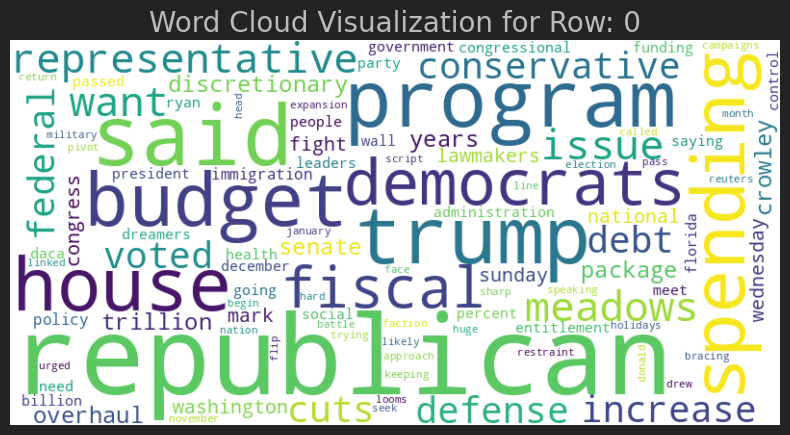

In [ ]:
# Function to generate word cloud for a specific row in a dataframe based on 'clean_joined' column
def plot_word_cloud_for_row(dataframe, row_index, column_name):
    # Extract text from the selected row
    text = dataframe.loc[row_index, column_name]

    # Generate a word cloud without additional stopwords
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        max_words=100,
        contour_color='steelblue'
    ).generate(text)

    # Plot the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud Visualization for Row: {row_index}', fontsize=20)
    plt.show()


selected_rows = 0

# Visualize word cloud for the specific row 0 in the 'clean_joined' column
plot_word_cloud_for_row(df, selected_rows, 'clean_joined')

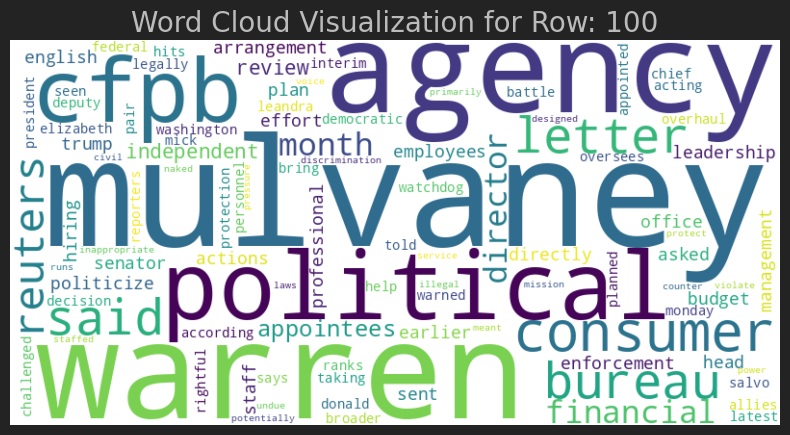

In [ ]:
# Visualize word cloud for the specific row 0 in the 'clean_joined' column
plot_word_cloud_for_row(df, 100, 'clean_joined')

# TASK #5: VISUALIZE CLEANED UP DATASET

In [ ]:
df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
42829  'Fully committed' NATO backs new U.S. approach...   
42830  LexisNexis withdrew two products from Chinese ...   
42831  Minsk cultural hub becomes haven from authorities   
42832  Vatican upbeat on possibility of Pope Francis ...   
42833  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
42829  BRUSSELS (Reuters) - NATO allies on Tuesday we...     worldnews   
42830  LONDON (Reuters) - LexisNexis, a provider of l...     worldnews   
42831  MINSK (Reuters) - In the shadow of disused Sov...     worldnews   
42832  MOSCOW (Reuters) - Vatican Secretary of State ...     worldnews   
42833  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...     worldnews   

       isfake                                           original  \
0           1  As U.S. budget fight looms, Republicans flip t...   
1           1  U.S. military to accept transgender recruits o...   
2           1  Senior U.S. Republican senator: 'Let Mr. Muell...   
3           1  FBI Russia probe helped by Australian diplomat...   
4           1  Trump wants Postal Service to charge 'much mor...   
...       ...                                                ...   
42829       0  'Fully committed' NATO backs new U.S. approach...   
42830       0  LexisNexis withdrew two products from Chinese ...   
42831       0  Minsk cultural hub becomes haven from authorit...   
42832       0  Vatican upbeat on possibility of Pope Francis ...   
42833       0  Indonesia to buy $1.14 billion worth of Russia...   

                                                   clean  \
0      [budget, fight, looms, republicans, flip, fisc...   
1      [military, accept, transgender, recruits, mond...   
2      [senior, republican, senator, mueller, washing...   
3      [russia, probe, helped, australian, diplomat, ...   
4      [trump, wants, postal, service, charge, amazon...   
...                                                  ...   
42829  [fully, committed, nato, backs, approach, afgh...   
42830  [lexisnexis, withdrew, products, chinese, mark...   
42831  [minsk, cultural, authorities, minsk, reuters,...   
42832  [vatican, upbeat, possibility, pope, francis, ...   
42833  [indonesia, billion, worth, russian, jets, jak...   

                                            clean_joined  
0      budget fight looms republicans flip fiscal scr...  
1      military accept transgender recruits monday pe...  
2      senior republican senator mueller washington r...  
3      russia probe helped australian diplomat washin...  
4      trump wants postal service charge amazon shipm...  
...                                                  ...  
42829  fully committed nato backs approach afghanista...  
42830  lexisnexis withdrew products chinese market lo...  
42831  minsk cultural authorities minsk reuters shado...  
42832  vatican upbeat possibility pope francis visiti...  
42833  indonesia billion worth russian jets jakarta r...  

[42834 rows x 7 columns]

<Axes: xlabel='count', ylabel='subject'>

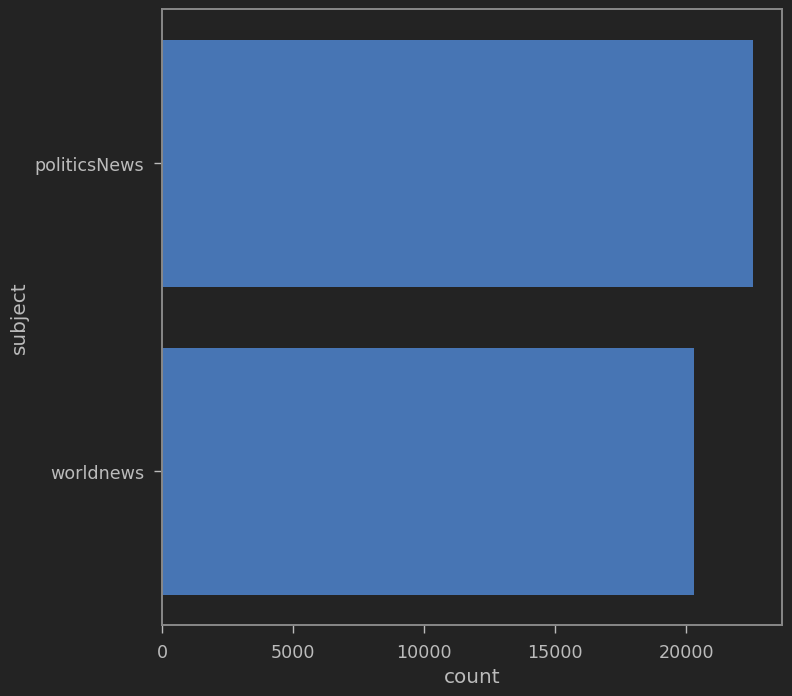

In [ ]:
# plot the number of samples in 'subject'
plt.figure(figsize = (8, 8))
sns.countplot(y = "subject", data = df)

ADDITIONAL TASK #3:
- Plot the count plot for fake vs. true news
- Plot the word count for three samples


<Axes: xlabel='count', ylabel='isfake'>

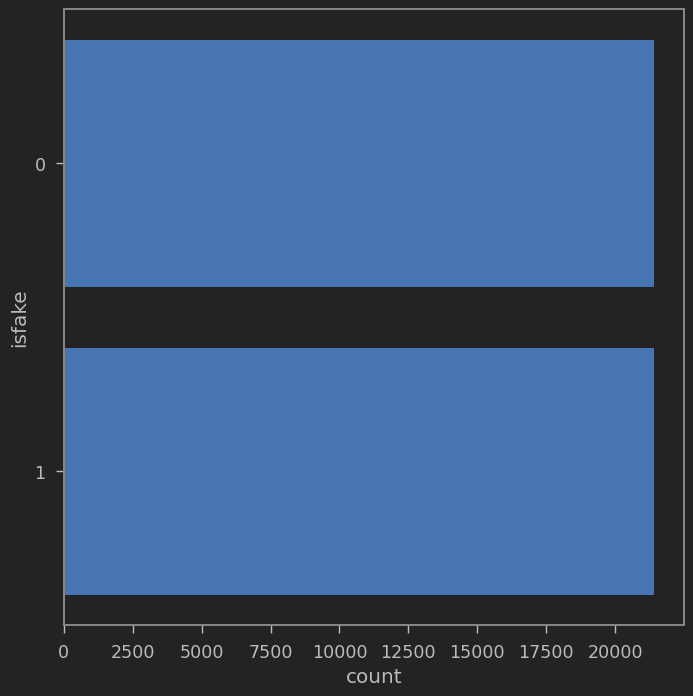

In [ ]:
# plot the number of samples in 'subject'
plt.figure(figsize = (8, 8))
sns.countplot(y = "isfake", data = df)

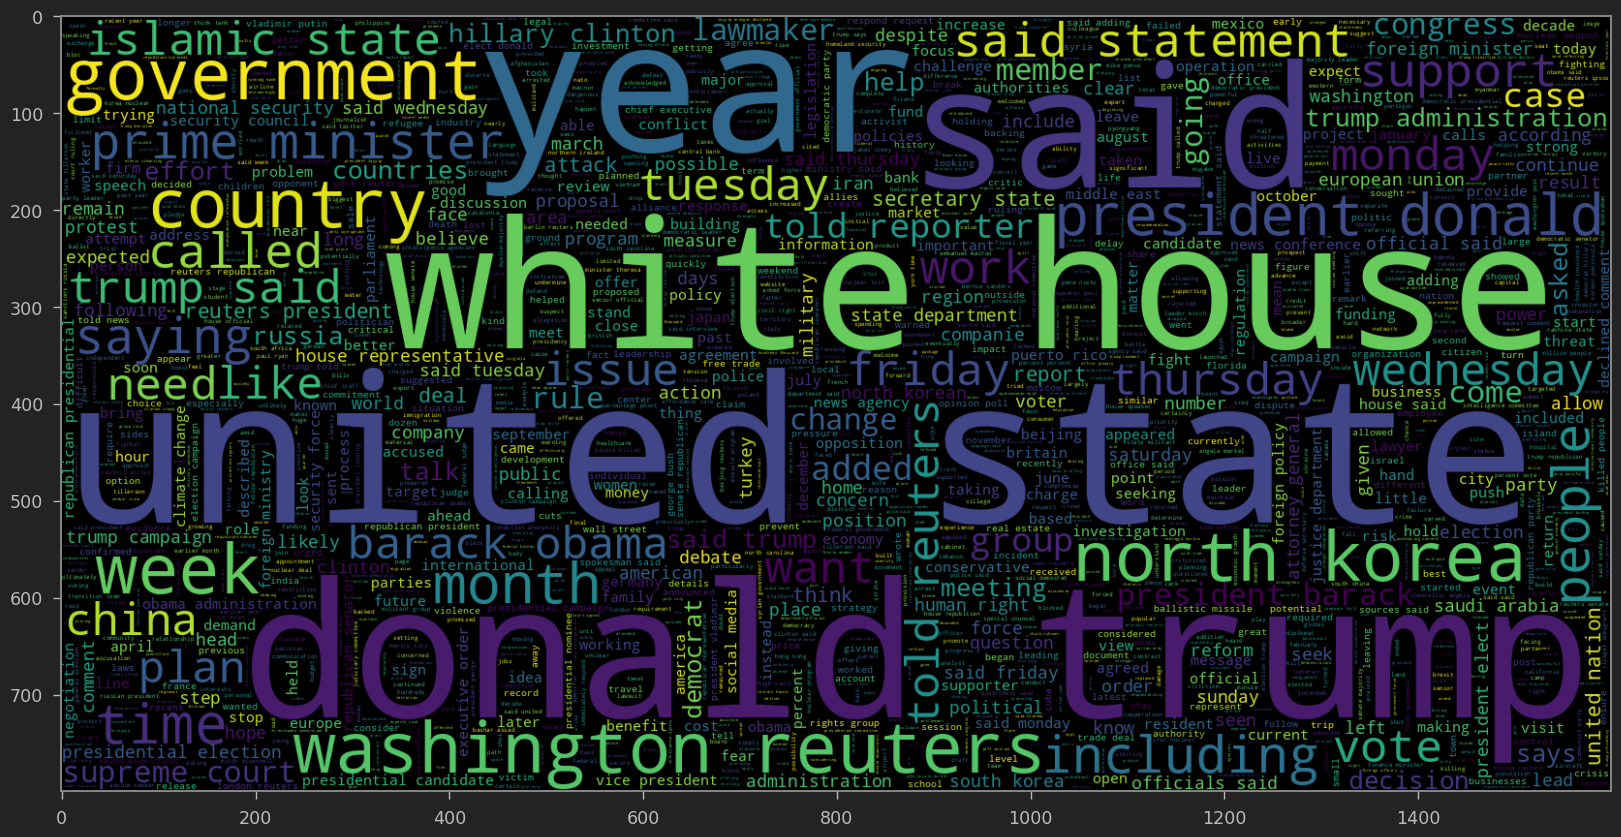

In [ ]:
# plot the word cloud for text that is Real
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.isfake == 1].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

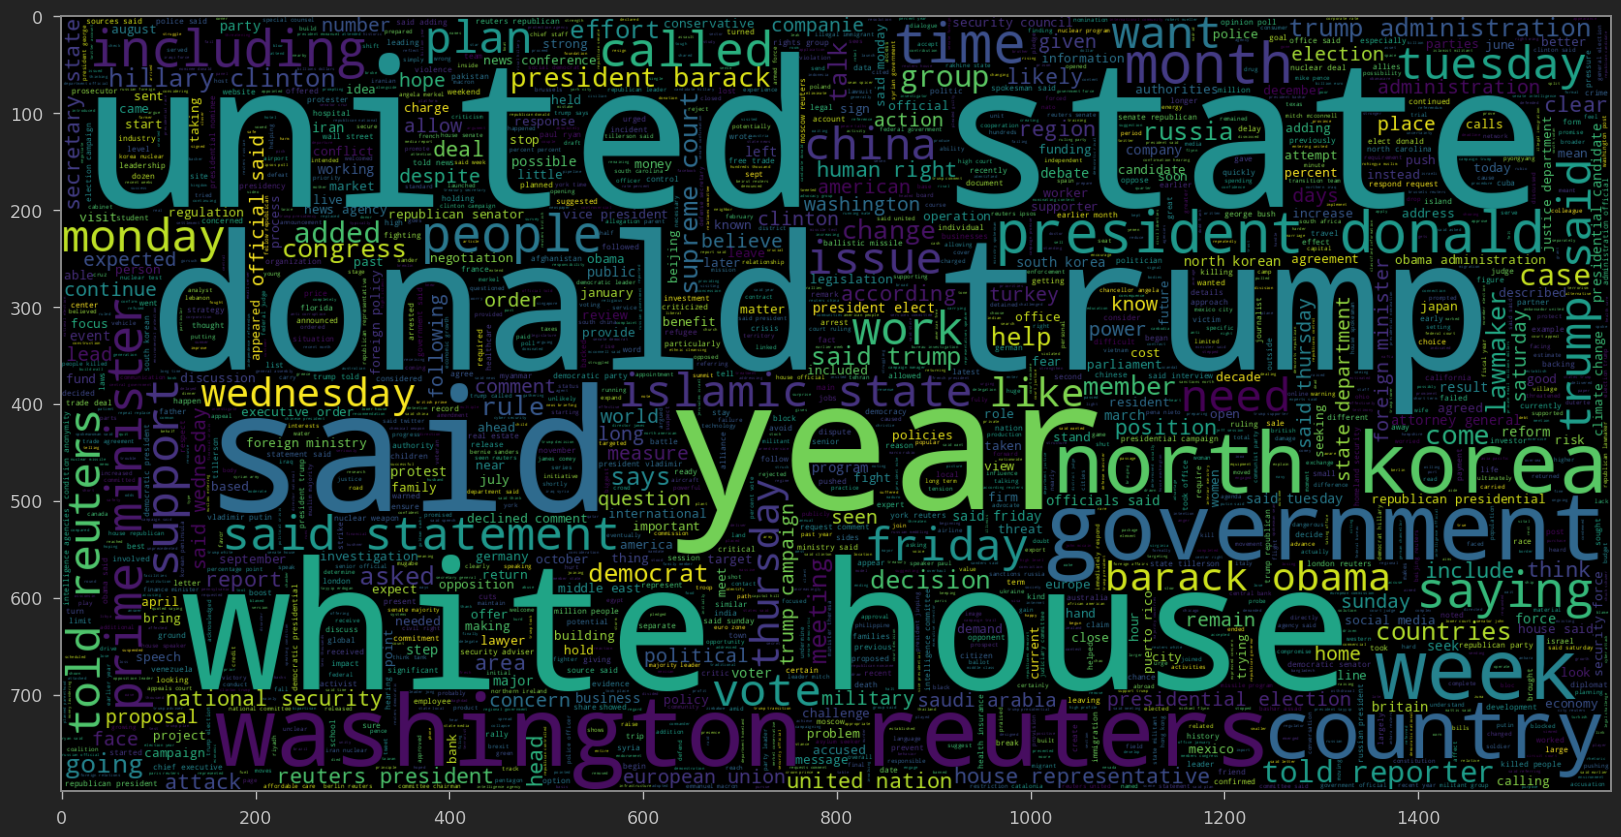

In [ ]:
# plot the word cloud for text that is Fake
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.isfake == 0].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

In [ ]:
# length of maximum document will be needed to create word embeddings
maxlen = -1
for doc in df.clean_joined:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is =", maxlen)

The maximum number of words in any document is = 1962


In [ ]:
# visualize the distribution of number of words in a text
import plotly.express as px
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in df.clean_joined], nbins = 100)
fig.show()

# TASK #6: PREPARE THE DATA BY PERFORMING TOKENIZATION AND PADDING

![image.png](attachment:image.png)

In [ ]:
# split data into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.clean_joined, df.isfake, test_size = 0.2)

In [ ]:
from nltk import word_tokenize

In [ ]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)


In [ ]:
print("The encoding for document\n",df.clean_joined[0],"\n is : ",train_sequences[0])

The encoding for document
 budget fight looms republicans flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot republicans representative mark meadows speaking face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy november congressional election campaigns approach republicans seek control congress president donald trump republicans want budget increase military spending democrats want proportional increases defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration willing going increase defense discretionary spending percent meadows chairman small influential house freedom caucus said program democrats say

In [ ]:
# Add padding can either be maxlen = 4406 or smaller number maxlen = 40 seems to work well based on results
padded_train = pad_sequences(train_sequences,maxlen = 40, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 40, truncating = 'post')

In [ ]:
for i,doc in enumerate(padded_train[:2]):
     print("The padded encoding for document",i+1," is : ",doc)

The padded encoding for document 1  is :  [   27  1964   682    21   257  3564   215  1387    81   300     3    27
    34   183     1    41  1964   682   179   312    21   257    31  1239
   215  1387  1287    81  2437  1624   493   733   183    92  5898   145
    27 10875   730  1352]
The padded encoding for document 2  is :  [  605   377     2   210   443 14510 14248  3714     3     4    18     2
   210   605 14510 14248   443     6   290   232   460   250   154   227
  4598  1285    34    28  8689  4895     1    53     2   381  3870  6652
  8550   250   605    49]


# TASK #7: UNDERSTAND THE THEORY AND INTUITION BEHIND RECURRENT NEURAL NETWORKS AND LSTM


![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

# TASK #8: UNDERSTAND THE INTUITION BEHIND LONG SHORT TERM MEMORY (LSTM) NETWORKS

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

# TASK #9: BUILD AND TRAIN THE MODEL

![image.png](attachment:image.png)

In [ ]:
# Sequential Model
model = Sequential()

# embeddidng layer
model.add(Embedding(total_words, output_dim = 128))
# model.add(Embedding(total_words, output_dim = 240))


# Bi-Directional RNN and LSTM
model.add(Bidirectional(LSTM(128)))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1,activation= 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         7767936   
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              263168    
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 8,064,129
Trainable params: 8,064,129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Checking total_words after embedding
total_words

60687

In [ ]:
# Convert the target label into array
y_train = np.asarray(y_train)

In [ ]:
# train the model
# 10% (0.1) for the cross validation, and 90% (0.9) for training of the model
model.fit(padded_train, y_train, batch_size = 64, validation_split = 0.1, epochs = 2)

Epoch 1/2
482/482 [==============================] - 128s 257ms/step - loss: 0.6935 - acc: 0.4979 - val_loss: 0.6934 - val_acc: 0.4943
Epoch 2/2
482/482 [==============================] - 118s 244ms/step - loss: 0.6934 - acc: 0.4975 - val_loss: 0.6932 - val_acc: 0.4993


ADDITIONAL TASK #4:
- Change the embedding output dimension and print out the model summary
- How many trainable parameters are there?


In [ ]:
"""
# Sequential Model
model = Sequential()

# embeddidng layer
#model.add(Embedding(total_words, output_dim = 128))
model.add(Embedding(total_words, output_dim = 240))


# Bi-Directional RNN and LSTM
model.add(Bidirectional(LSTM(128)))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1,activation= 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()
"""

# TASK #9: ASSESS TRAINED MODEL PERFORMANCE


In [ ]:
# make prediction
pred = model.predict(padded_test)

In [ ]:
# if the predicted value is >0.5 it is real else it is fake
prediction = []
for i in range(len(pred)):
    if pred[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

In [ ]:
# getting the accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test), prediction)

print("Model Accuracy : ", accuracy)

Model Accuracy :  0.5008754523170305


<Axes: >

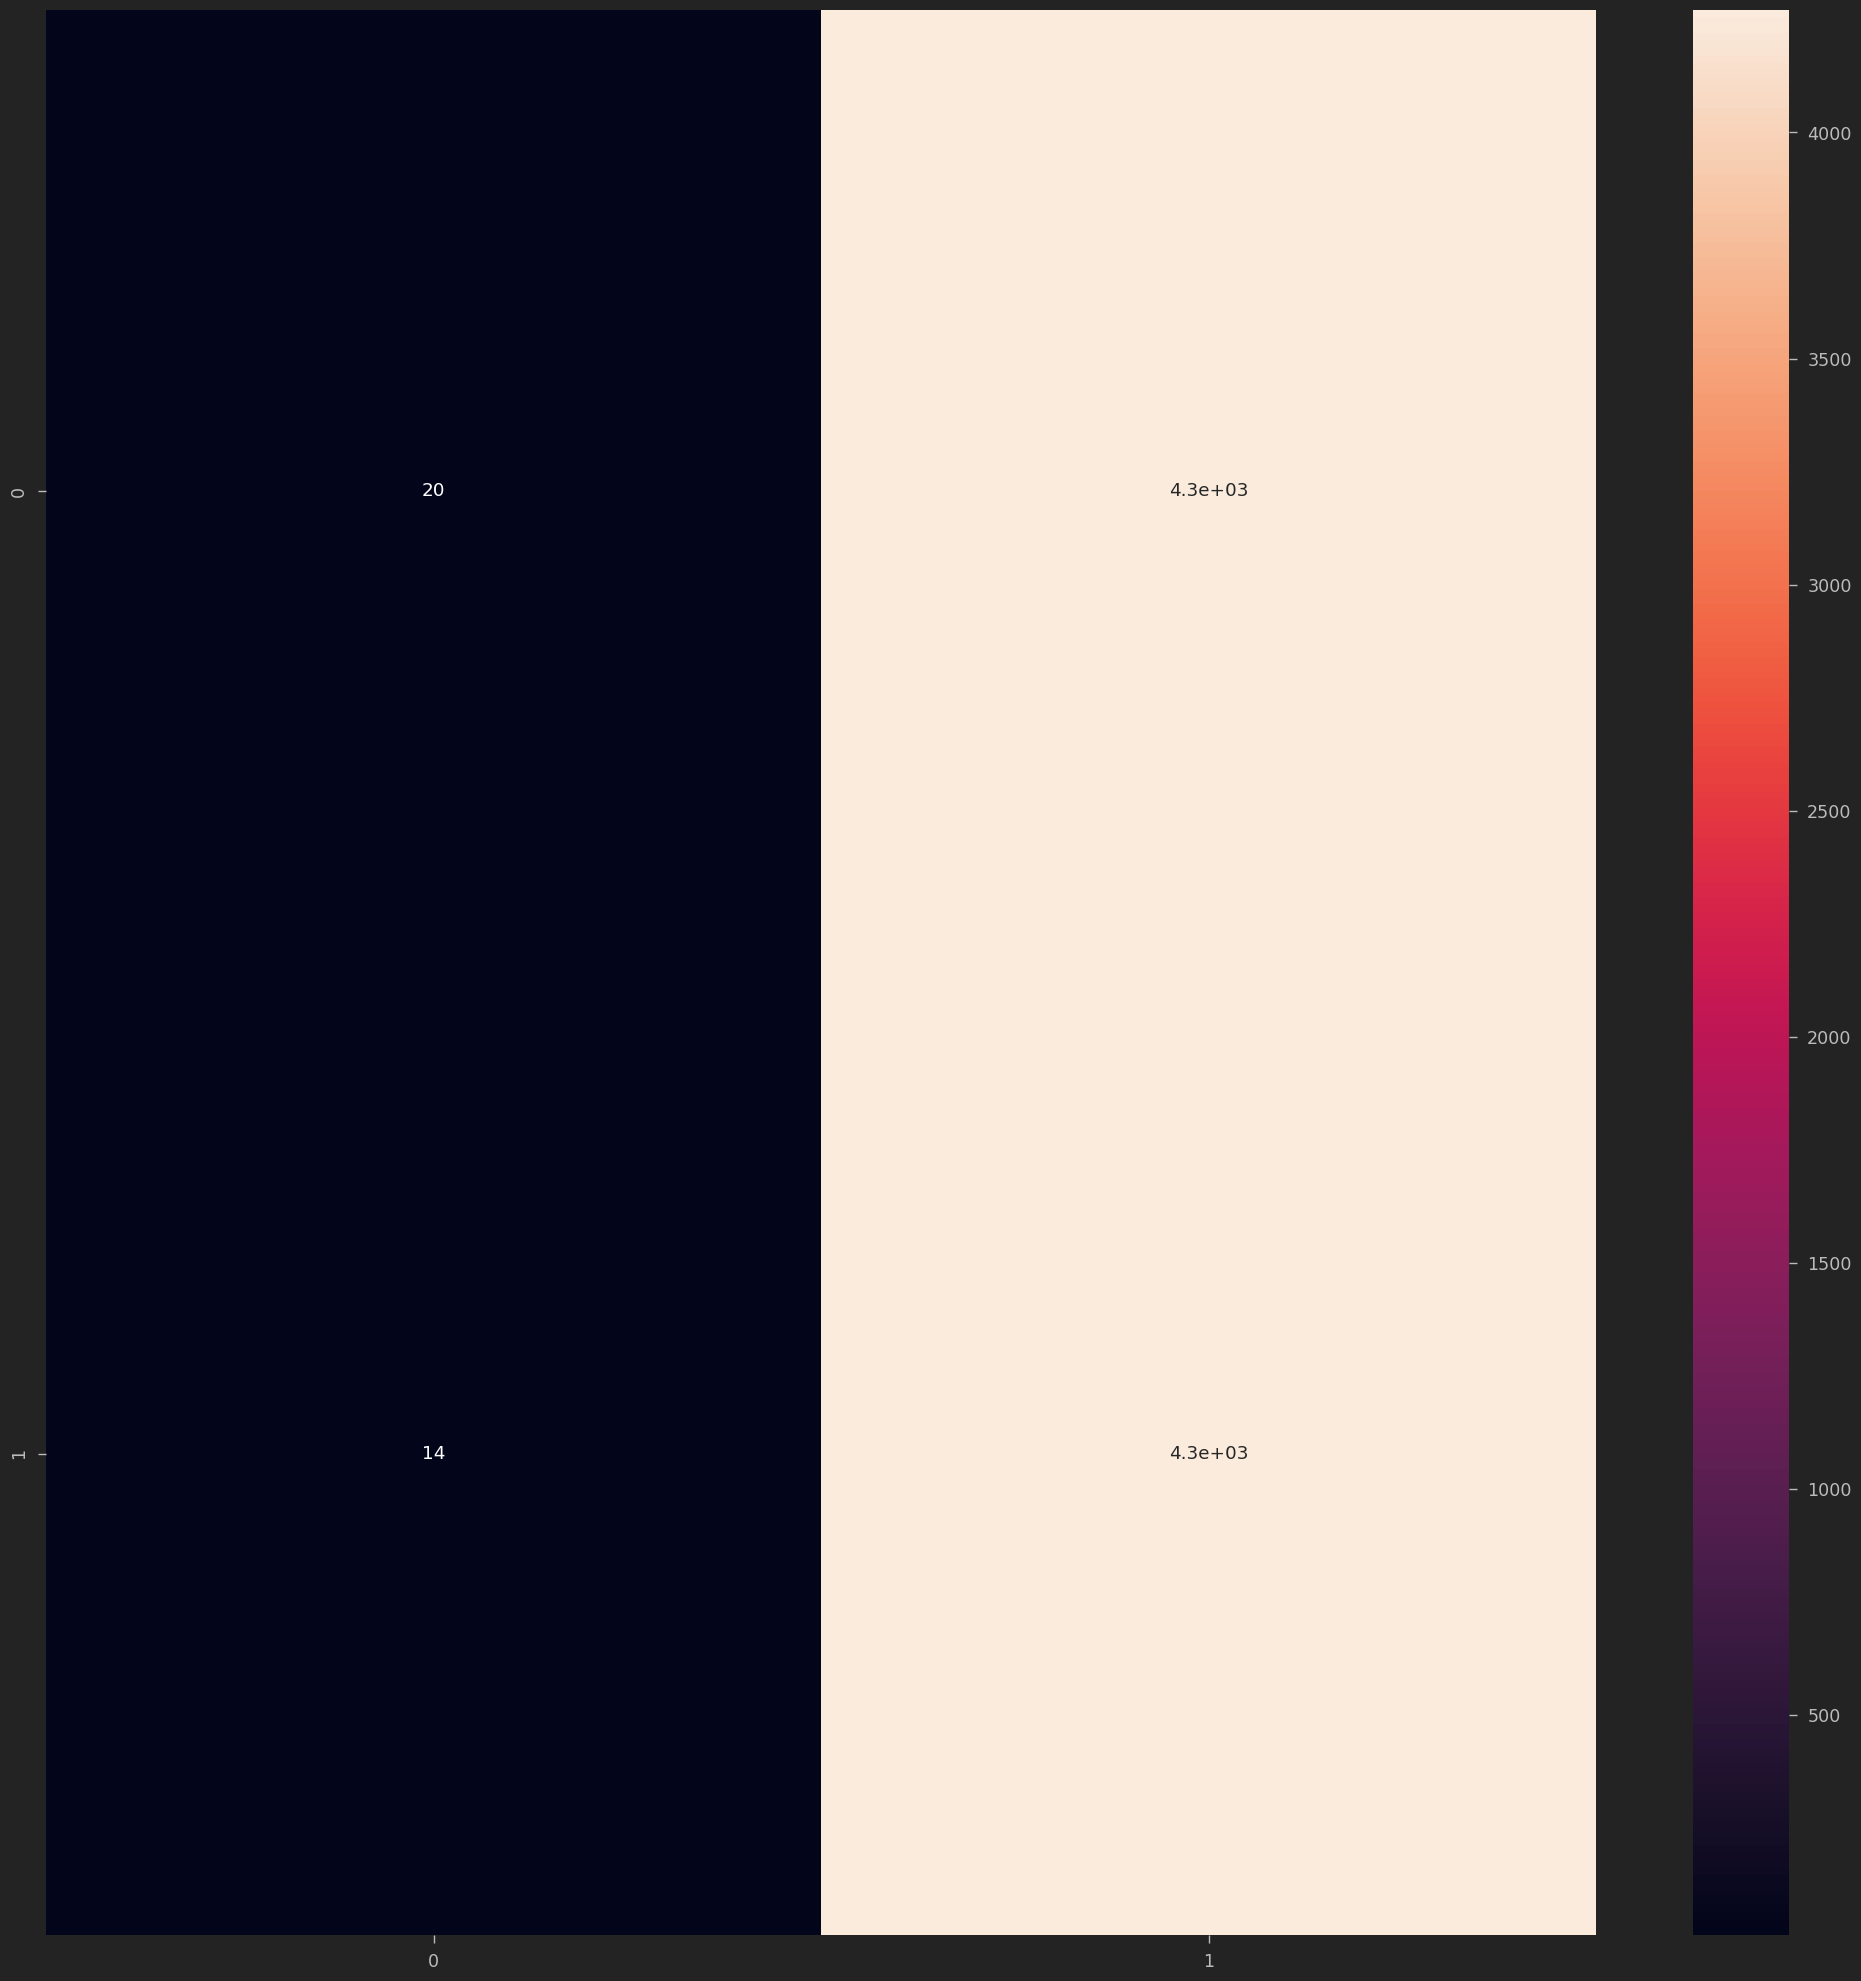

In [ ]:
# get the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

In [ ]:
# category dict
category = { 0: 'Fake News', 1 : "Real News"}

# CONGRATULATIONS!